In [4]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker for generating synthetic data
fake = Faker()

# Configuration
n_customers = 1000  # Number of unique customers
n_samples = 10000  # Number of rows in the dataset (i.e., transactions)
action_types = ['p2p_transfer', 'transfer_in', 'transfer_out', 'investment', 'login', 'logout',
                'atm_withdrawal', 'online_purchase', 'bill_payment']
genders = ['Male', 'Female', 'Non-binary', 'Other']
races = ['White', 'Black', 'Asian', 'Hispanic', 'Mixed', 'Other']
us_zip_codes = [fake.zipcode_in_state(state_abbr) for state_abbr in [fake.state_abbr() for _ in range(50)] for _ in range(20)]
us_states = [fake.state_abbr() for _ in range(50)]
blocked_status = ['blocked', 'unblocked']
investment_types = ['stocks', 'cryptocurrency', 'mutual_funds', 'ETFs']
devices_used = ['iOS', 'Android', 'Web']
login_methods = ['password', 'biometric', 'two_factor']

# Generate 1000 unique customers
customers = [{
    'Customer_ID': fake.uuid4(),
    'Gender': random.choice(genders),
    'Age': random.randint(18, 65),
    'Race': random.choice(races),
    'Zip_Code': random.choice(us_zip_codes),
    'State': random.choice(us_states)
} for _ in range(n_customers)]

# Function to introduce bias in actions
def is_biased_action(age, race, transaction_amount, account_balance):
    # Bias rules:
    # - Older users (>50) more likely to face declines
    # - Certain races more likely to face declines
    # - Large transaction amounts more likely to be blocked
    # - Low account balances more likely to be blocked

    bias_score = 0

    # Age bias: More likely to decline actions for users over 50
    if age > 50:
        bias_score += 1

    # Race bias: Assuming certain races are more prone to declines
    if race in ['Black', 'Hispanic']:
        bias_score += 1

    # Transaction amount bias: Large amounts more likely to be blocked/declined
    if transaction_amount > 5000:
        bias_score += 1

    # Account balance bias: Low account balances increase likelihood of decline
    if account_balance < 500:
        bias_score += 1

    # A higher bias score makes it more likely the action will be blocked/declined
    if bias_score > 2:
        return 'decline'
    else:
        return 'approve'

# Create a random dataset generator function over a 3-month period
def generate_synthetic_data(n_samples, customers):
    data = []
    current_date = datetime.now()

    for _ in range(n_samples):
        # Randomly select a customer
        customer = random.choice(customers)
        customer_id = customer['Customer_ID']
        gender = customer['Gender']
        age = customer['Age']
        race = customer['Race']
        zip_code = customer['Zip_Code']
        state = customer['State']

        # Action data
        action_type = random.choice(action_types)
        timestamp = fake.date_time_between(start_date='-3M', end_date='now')  # Random timestamp over last 3 months
        action_status = random.choice(blocked_status)

        # Random transaction features
        transaction_amount_usd = round(random.uniform(1, 20000), 2) if action_type not in ['login', 'logout'] else 0
        account_balance = round(random.uniform(100, 50000), 2)

        # Determine if the action is biased based on rules
        is_action_biased = is_biased_action(age, race, transaction_amount_usd, account_balance)

        # Behavior features
        number_of_logins_last_30_days = random.randint(0, 50)
        number_of_failed_logins_last_30_days = random.randint(0, 10)
        device_used = random.choice(devices_used)
        login_method = random.choice(login_methods)

        # Investment-specific features (for investment-related actions)
        investment_type = random.choice(investment_types) if action_type == 'investment' else None
        investment_amount_usd = round(random.uniform(50, 10000), 2) if action_type == 'investment' else None

        # Transfer-specific features (for p2p transfers and bank transfers)
        recipient_id = fake.uuid4() if action_type == 'p2p_transfer' else None
        transfer_bank_type = random.choice(['checking', 'savings']) if 'transfer' in action_type else None

        # Additional features for transaction behavior
        number_of_transactions_last_30_days = random.randint(0, 100)
        avg_transaction_amount_usd_last_30_days = round(random.uniform(10, 500), 2) if number_of_transactions_last_30_days > 0 else 0

        # Generate the time of day for the action
        time_of_day = timestamp.time()

        data.append({
            'Customer_ID': customer_id,
            'Gender': gender,
            'Age': age,
            'Race': race,
            'Zip_Code': zip_code,
            'State': state,
            'Action_Type': action_type,
            'Transaction_Amount_USD': transaction_amount_usd,
            'Account_Balance': account_balance,
            'Is_Action_Biased': is_action_biased,
            'Action_Status': action_status,
            'Timestamp': timestamp,
            'Time_Of_Day': time_of_day,
            'Device_Used': device_used,
            'Login_Method': login_method,
            'Number_Of_Logins_Last_30_Days': number_of_logins_last_30_days,
            'Number_Of_Failed_Logins_Last_30_Days': number_of_failed_logins_last_30_days,
            'Investment_Type': investment_type,
            'Investment_Amount_USD': investment_amount_usd,
            'Transfer_Bank_Type': transfer_bank_type,
            'Number_Of_Transactions_Last_30_Days': number_of_transactions_last_30_days,
            'Avg_Transaction_Amount_USD_Last_30_Days': avg_transaction_amount_usd_last_30_days
        })

    return pd.DataFrame(data)

# Generate the dataset
df_synthetic = generate_synthetic_data(n_samples, customers)

# Display the dataset
# import ace_tools as tools; tools.display_dataframe_to_user(name="Customer Behavior Based Synthetic Transaction Data", dataframe=df_synthetic)


In [3]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.7 MB/s eta 0:00:00


In [5]:
df_synthetic.columns

Index(['Customer_ID', 'Gender', 'Age', 'Race', 'Zip_Code', 'State',
       'Action_Type', 'Transaction_Amount_USD', 'Account_Balance',
       'Is_Action_Biased', 'Action_Status', 'Timestamp', 'Time_Of_Day',
       'Device_Used', 'Login_Method', 'Number_Of_Logins_Last_30_Days',
       'Number_Of_Failed_Logins_Last_30_Days', 'Investment_Type',
       'Investment_Amount_USD', 'Transfer_Bank_Type',
       'Number_Of_Transactions_Last_30_Days',
       'Avg_Transaction_Amount_USD_Last_30_Days'],
      dtype='object')

In [6]:
df_group =df_synthetic.groupby('Customer_ID')

In [7]:
df_synthetic

,Customer_ID,Gender,Age,Race,Zip_Code,State,Action_Type,Transaction_Amount_USD,Account_Balance,Is_Action_Biased,...,Time_Of_Day,Device_Used,Login_Method,Number_Of_Logins_Last_30_Days,Number_Of_Failed_Logins_Last_30_Days,Investment_Type,Investment_Amount_USD,Transfer_Bank_Type,Number_Of_Transactions_Last_30_Days,Avg_Transaction_Amount_USD_Last_30_Days
0,660a94cb-e6ad-43e6-8654-c03994e3d473,Female,41,Other,84698,AS,logout,0.00,5905.04,approve,...,23:45:25.497051,iOS,two_factor,44,10,None,NaN,None,30,85.06
1,270c8cfd-d78f-471f-be15-0224862f4e3d,Male,37,Mixed,31944,SC,logout,0.00,40929.14,approve,...,06:16:13.591385,iOS,password,35,6,None,NaN,None,27,231.05
2,98a87fa9-b7ab-4850-b517-c713573328df,Non-binary,46,Other,14133,AZ,login,0.00,34824.46,approve,...,14:00:07.823873,Web,password,46,7,None,NaN,None,26,167.50
3,625afd7c-b1fd-497e-8cbd-df5e62d1efba,Other,60,Mixed,85026,RI,bill_payment,15045.39,25763.63,approve,...,18:05:35.023116,Web,biometric,6,7,None,NaN,None,89,337.53
4,d63bcace-ee51-4cf2-b1df-a201b99dc9ab,Female,48,Mixed,97231,GA,transfer_in,7530.80,46099.24,approve,...,03:22:06.237458,Web,password,15,5,None,NaN,checking,17,230.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,a5565e0c-e1f6-47c5-9a03-862fdcf474af,Female,56,Other,96799,MO,transfer_in,2285.58,30781.83,approve,...,12:43:03.343008,Web,password,17,10,None,NaN,savings,77,310.84
9996,aa41b8fa-7808-46cf-85e9-dc315b8cbfe6,Male,29,Asian,53680,NJ,transfer_in,19445.84,11699.32,approve,...,10:32:48.637624,Web,two_factor,27,1,None,NaN,checking,20,43.59
9997,4b56f82b-f5d4-4c30-82df-009b76dac407,Other,18,Hispanic,96927,AZ,p2p_transfer,7716.16,14941.59,approve,...,08:21:52.188437,Web,two_factor,17,10,None,NaN,checking,8,414.72
9998,ff3256aa-2971-4a5d-a1eb-48ad59389dd4,Other,41,White,01411,PW,p2p_transfer,12013.23,28049.70,approve,...,05:13:22.167679,iOS,two_factor,32,6,None,NaN,savings,1,177.11


In [8]:
# Summarize bias by race
bias_by_race = df_synthetic.groupby('Race')['Is_Action_Biased'].apply(lambda x: (x == 'decline').mean()).reset_index()
bias_by_race.columns = ['Race', 'Decline_Rate']
print(bias_by_race)

# Summarize bias by age group
df_synthetic['Age_Group'] = pd.cut(df_synthetic['Age'], bins=[18, 30, 50, 65], labels=['18-30', '30-50', '50-65'])
bias_by_age = df_synthetic.groupby('Age_Group')['Is_Action_Biased'].apply(lambda x: (x == 'decline').mean()).reset_index()
bias_by_age.columns = ['Age_Group', 'Decline_Rate']
print(bias_by_age)


       Race  Decline_Rate
0     Asian      0.001212
1     Black      0.223662
2  Hispanic      0.179811
3     Mixed      0.000000
4     Other      0.000558
5     White      0.000608
  Age_Group  Decline_Rate
0     18-30      0.000888
1     30-50      0.001382
2     50-65      0.211875


<ipython-input-8-2ce7fd3bf731>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bias_by_age = df_synthetic.groupby('Age_Group')['Is_Action_Biased'].apply(lambda x: (x == 'decline').mean()).reset_index()


In [9]:
import matplotlib.pyplot as plt


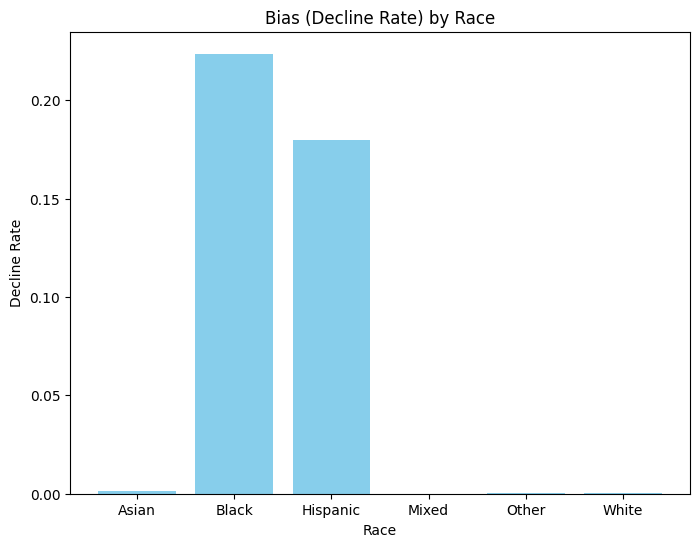

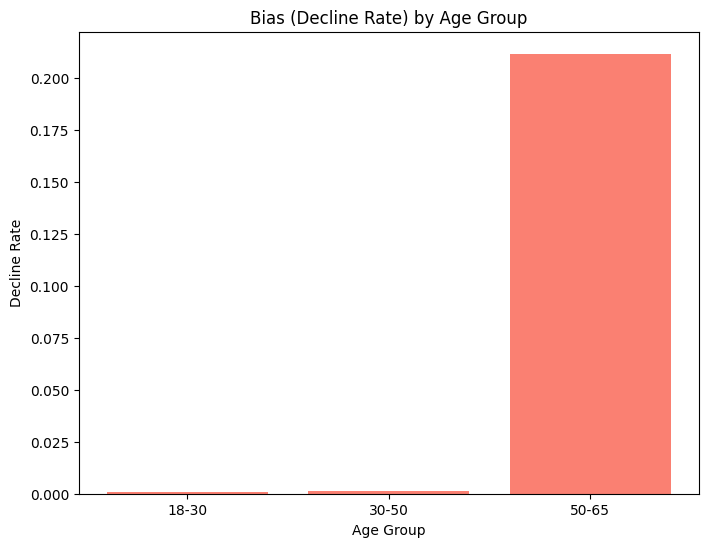

       Race  Decline_Rate_High_Transactions
0     Asian                        0.002079
1     Black                        0.375238
2  Hispanic                        0.301724
3     Mixed                        0.000000
4     Other                        0.000953
5     White                        0.001068


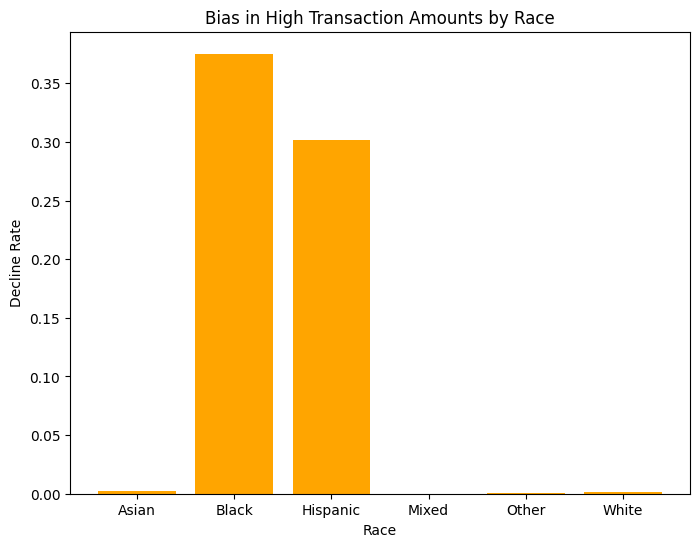

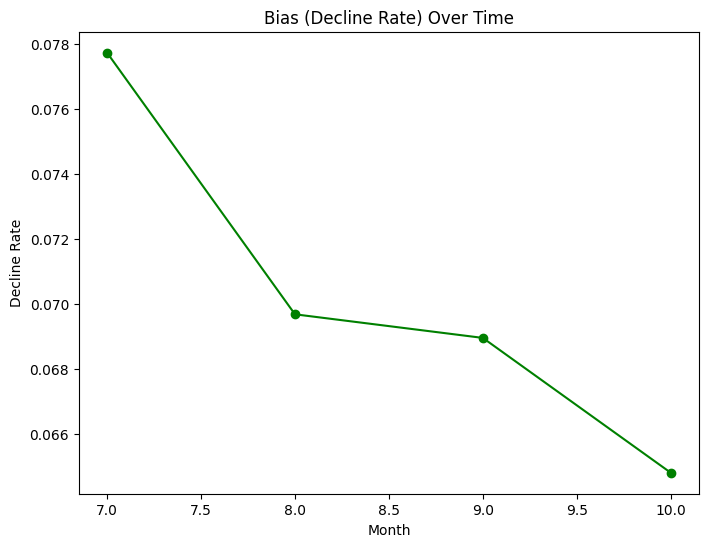

In [10]:

# Plot bias by race
plt.figure(figsize=(8, 6))
plt.bar(bias_by_race['Race'], bias_by_race['Decline_Rate'], color='skyblue')
plt.title('Bias (Decline Rate) by Race')
plt.ylabel('Decline Rate')
plt.xlabel('Race')
plt.show()

# Plot bias by age group
plt.figure(figsize=(8, 6))
plt.bar(bias_by_age['Age_Group'], bias_by_age['Decline_Rate'], color='salmon')
plt.title('Bias (Decline Rate) by Age Group')
plt.ylabel('Decline Rate')
plt.xlabel('Age Group')
plt.show()

# Filter high transaction amounts
high_transactions = df_synthetic[df_synthetic['Transaction_Amount_USD'] > 5000]

# Group by race and check decline rate for high transactions
bias_by_race_high_trans = high_transactions.groupby('Race')['Is_Action_Biased'].apply(lambda x: (x == 'decline').mean()).reset_index()
bias_by_race_high_trans.columns = ['Race', 'Decline_Rate_High_Transactions']
print(bias_by_race_high_trans)

# Plot bias in high transaction amounts by race
plt.figure(figsize=(8, 6))
plt.bar(bias_by_race_high_trans['Race'], bias_by_race_high_trans['Decline_Rate_High_Transactions'], color='orange')
plt.title('Bias in High Transaction Amounts by Race')
plt.ylabel('Decline Rate')
plt.xlabel('Race')
plt.show()

# Analyze bias over time (monthly)
df_synthetic['Month'] = df_synthetic['Timestamp'].dt.month
bias_by_month = df_synthetic.groupby('Month')['Is_Action_Biased'].apply(lambda x: (x == 'decline').mean()).reset_index()
bias_by_month.columns = ['Month', 'Decline_Rate']

# Plot decline rate over time (monthly)
plt.figure(figsize=(8, 6))
plt.plot(bias_by_month['Month'], bias_by_month['Decline_Rate'], marker='o', linestyle='-', color='green')
plt.title('Bias (Decline Rate) Over Time')
plt.ylabel('Decline Rate')
plt.xlabel('Month')
plt.show()


In [ ]:

df_synthetic.to_parquet("synthetic_data.pq")

In [11]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime

# Initialize Faker for generating synthetic data
fake = Faker()

# Configuration
n_customers = 1000  # Number of unique customers
n_transactions = 5000  # Number of transactions
states = ['NY', 'IL', 'AZ', 'DE', 'GE', 'TN', 'NI']
genders = ['Male', 'Female', 'Non-binary']
races = ['White', 'Black', 'Asian', 'Hispanic', 'Mixed', 'Other']
income_levels = ['Low', 'Middle', 'High']
occupations = ['Software Engineer', 'Teacher', 'Doctor', 'Retail Worker', 'Artist', 'Freelancer']

# Generate synthetic customer data with additional demographics
def generate_customers(n_customers):
    customers = []
    for i in range(n_customers):
        customer = {
            'customerID': i,
            'Name': fake.first_name(),
            'Age': random.randint(18, 90),
            'Gender': random.choice(genders),
            'Race': random.choice(races),
            'Income_Level': random.choice(income_levels),
            'Occupation': random.choice(occupations),
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Generate synthetic transaction data with Hispanic Low-Income bias
def generate_transactions(n_transactions, customer_df):
    transactions = []
    for i in range(n_transactions):
        senderID = random.randint(0, len(customer_df) - 1)
        receiverID = random.randint(0, len(customer_df) - 1)
        while receiverID == senderID:
            receiverID = random.randint(0, len(customer_df) - 1)  # Ensure sender != receiver

        # Get sender demographics
        sender_race = customer_df.loc[senderID, 'Race']
        sender_income = customer_df.loc[senderID, 'Income_Level']

        # Define bias logic: Hispanic + Low Income -> 80% chance of being biased
        if sender_race == 'Hispanic' and sender_income == 'Low':
            was_biased = 1 if random.random() < 0.8 else 0
        else:
            was_biased = 1 if random.random() < 0.1 else 0  # Small chance of bias for other groups

        transaction = {
            'transactionID': i,
            'senderID': senderID,
            'receiverID': receiverID,
            'sender_state': random.choice(states),
            'receiver_state': random.choice(states),
            'date': fake.date_between(start_date='-3y', end_date='today'),
            'amount': round(random.uniform(50, 100000), 2),
            'confusion_value': random.choice(['TN', 'FP', 'TP', 'FN']),  # Example confusion matrix values
            'was_biased': was_biased  # Bias determined by race and income
        }
        transactions.append(transaction)
    return pd.DataFrame(transactions)

# Generate the data
customers_df = generate_customers(n_customers)
transactions_df = generate_transactions(n_transactions, customers_df)



In [12]:
customers_df

,customerID,Name,Age,Gender,Race,Income_Level,Occupation
0,0,Katelyn,69,Male,Mixed,High,Doctor
1,1,Sara,68,Female,Hispanic,High,Retail Worker
2,2,Lee,22,Non-binary,Other,High,Software Engineer
3,3,William,72,Male,Other,Low,Software Engineer
4,4,Vernon,33,Non-binary,Black,High,Freelancer
...,...,...,...,...,...,...,...
995,995,Troy,82,Female,Other,High,Artist
996,996,Justin,83,Female,White,High,Software Engineer
997,997,Lori,66,Female,Mixed,Middle,Doctor
998,998,Ronald,36,Female,Asian,Middle,Doctor


In [13]:
customers_df.to_parquet("customers_data.pq")

In [ ]:
transactions_df.to_parquet("transaction_data.pq")

In [17]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime

# Initialize Faker for generating synthetic data
fake = Faker()

# Configuration
n_customers = 1000  # Number of unique customers
n_transactions = 5000  # Number of transactions
actions = ['approved', 'declined', 're-imbursed']
action_weights = [0.7, 0.2, 0.1]  # 70% approved, 20% declined, 10% re-imbursed
merchants = ['Amazon', 'Walmart', 'Starbucks', 'Target', 'Uber', 'Lyft', 'McDonalds', 'Subway']
ip_addresses = [fake.ipv4() for _ in range(100)]  # Generate 100 random IP addresses

# Generate synthetic customer data
def generate_customers(n_customers):
    customers = []
    for i in range(n_customers):
        customer = {
            'customerID': i,
            'Name': fake.first_name(),
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Generate synthetic Cash Card transaction data
def generate_transactions(n_transactions, customer_df):
    transactions = []
    for i in range(n_transactions):
        customerID = random.randint(0, len(customer_df) - 1)

        transaction = {
            'transactionID': i,
            'customerID': customerID,
            'merchant_name': random.choice(merchants),
            'amount': round(random.uniform(5, 1000), 2),  # Transaction amounts between $5 and $1000
            'action': random.choices(actions, weights=action_weights, k=1)[0],  # Weighted choice of action
            'time_completed': fake.date_time_between(start_date='-1y', end_date='now'),  # Past year
            'ip_address': random.choice(ip_addresses),
            'longitude': round(random.uniform(-180, 180), 6),  # Optional Longitude
            'latitude': round(random.uniform(-90, 90), 6)      # Optional Latitude
        }
        transactions.append(transaction)
    return pd.DataFrame(transactions)

# Generate the data
customers_df_2 = generate_customers(n_customers)
transactions_df_2 = generate_transactions(n_transactions, customers_df)



In [18]:
customers_df_2

,customerID,Name
0,0,Steven
1,1,Alexandria
2,2,Jonathan
3,3,Donald
4,4,Matthew
...,...,...
995,995,Heidi
996,996,Karen
997,997,Kendra
998,998,Scott


In [19]:
transactions_df_2

,transactionID,customerID,merchant_name,amount,action,time_completed,ip_address,longitude,latitude
0,0,56,Starbucks,860.27,declined,2024-08-31 06:02:27.687595,179.152.194.186,-113.807658,-42.372604
1,1,409,Target,144.53,declined,2023-12-07 08:07:20.451637,173.64.65.25,-1.121183,11.962175
2,2,481,Lyft,384.59,approved,2024-10-02 00:37:54.809740,5.121.64.74,79.445438,-63.398948
3,3,668,McDonalds,478.42,declined,2024-04-04 13:06:11.925707,133.234.165.82,66.193617,43.192457
4,4,841,Uber,522.75,declined,2023-12-27 03:12:59.057462,87.252.159.130,-6.876976,-82.865822
...,...,...,...,...,...,...,...,...,...
4995,4995,946,Starbucks,311.84,re-imbursed,2024-01-26 11:57:37.983783,99.240.61.101,131.052343,72.257423
4996,4996,204,Target,416.56,approved,2024-10-25 00:18:22.404938,28.162.128.41,38.888644,47.315262
4997,4997,145,McDonalds,840.07,approved,2024-01-22 07:15:57.784377,202.123.163.19,-22.564138,-0.209190
4998,4998,998,Target,415.35,approved,2023-11-03 02:25:03.713372,82.5.48.207,70.723522,65.974573


In [20]:
transactions_df_2.to_parquet("transaction_with_geolocation.parquet")